# k-Nearest Neighbors

The kNN algorithm is like  a voting system where the majority class label determines the class label of a new data point among its `k` nearest neighbors.

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

print(X.shape)
print(y.shape)

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df.head()

(150, 4)
(150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
print(f'First row of X: {X[0]}')
print(f'First row of y: {y[0]}')

First row of X: [5.1 3.5 1.4 0.2]
First row of y: 0


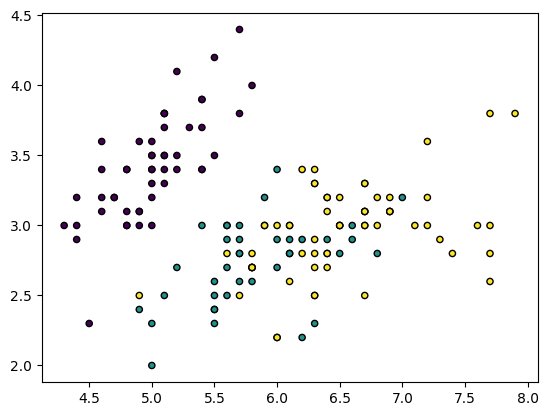

In [4]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20)
plt.show()

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        # store X and y as attributes
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    # core of the algorithm
    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get k nearest samples and labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote to get the most common label
        most_common = Counter(k_nearest_labels).most_common(1)

        return most_common[0][0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [7]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions

array([2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2,
       0, 1, 1, 1, 0, 0, 1, 0])

In [8]:
acc = np.sum(predictions == y_test) / len(y_test)
acc

np.float64(1.0)